# Impact of Learning Rate in Gradient Descent
This is and example of evaluating learning rate's effect on 1 layer neural network for Handwritten Digit Recognition.
I'm using MNIST dataset to train and test. This model includes 1 layer neural network with 10 neurons shich their activation function is Softmax.

In [1]:
# importing needed libraries
%matplotlib inline

import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
def plot_batch_images(images, labels, predictions = None, count = 100):
    
    plt.rcParams['axes.linewidth'] = 0.5
    count_row_col = np.sqrt(count)

    fig = plt.figure(figsize=(10, 10))
    
    for i in range(count):
        label = labels[i]
        image = images[i].reshape([28,28])
        sub = plt.subplot(count_row_col, count_row_col, i + 1)
        sub.set_xticks(())
        sub.set_yticks(())
        sub.text(1, 1, label, ha='center', va='top', size=8, color="k")
        
        if not(predictions is None):
            pred = predictions[i]
            sub.text(25, 1, pred, ha='center', va='top', size=8, color="r")
        
        sub.imshow(image, cmap=plt.get_cmap('gray_r'))
    
    fig.tight_layout(pad = 0)
    plt.show()

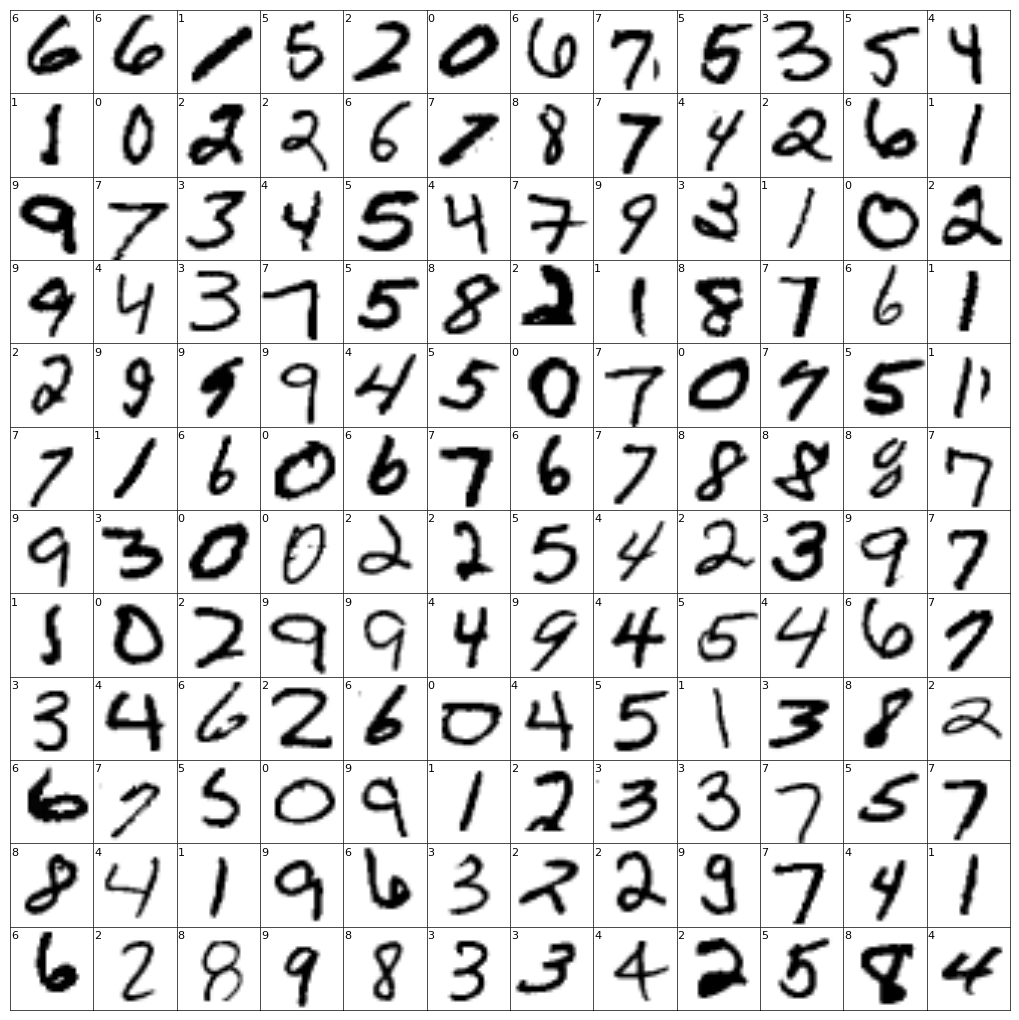

In [23]:
batch_X , batch_Y = mnist.train.next_batch(144)
plot_batch_images(batch_X, np.argmax(batch_Y, 1), count = 144)

In [5]:
# parameters
LEARNING_RATES = [0.03, 0.01, 0.007, 0.003, 0.001, 0.0005]
BATCH_SIZE = 100
ITERATION_COUNT = 10000
ACCURACY_CHECK = 10

In [6]:
def train_model(mnist_data, learning_rate):

    # initialisation
    tf.set_random_seed(0)
    X = tf.placeholder(tf.float32, shape=[None, 784])
    W = tf.Variable(tf.zeros([784,10]))
    b = tf.Variable(tf.zeros([10]))
    init = tf.global_variables_initializer()

    # start computation
    sess = tf.Session()
    sess.run(init)
    
    # model
    Y = tf.nn.softmax(tf.matmul(X, W) + b)

    # placeholder for correct answers
    Y_ = tf.placeholder(tf.float32, [None, 10])
    
    # loss function
    cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

    # % of correct answers found in batch
    is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_step = optimizer.minimize(cross_entropy)

    # preparing return values
    counter = 0 
    upper_bound = int(ITERATION_COUNT / ACCURACY_CHECK)
    train_accuracy = np.zeros(upper_bound)
    train_loss = np.zeros(upper_bound)
    test_accuracy = np.zeros(upper_bound)
    test_loss = np.zeros(upper_bound)
    predictions = np.zeros(upper_bound)
    
    for i in range(ITERATION_COUNT):
        
        # load batch of images and correct answers
        batch_X , batch_Y = mnist_data.train.next_batch(BATCH_SIZE)
        train_data = {X: batch_X, Y_: batch_Y}
        
        # train
        sess.run(train_step, feed_dict = train_data)
        
        if i % ACCURACY_CHECK == 0:
            
            a , c = sess.run([accuracy, cross_entropy], feed_dict = train_data)
            train_accuracy[counter] = a
            train_loss[counter] = c
            
            test_data = {X: mnist_data.test.images, Y_: mnist_data.test.labels}
            pred, a , c = sess.run([Y, accuracy, cross_entropy], feed_dict = test_data)
            test_accuracy[counter] = a
            test_loss[counter] = c
            counter += 1
            
    predictions = tf.argmax(pred,1).eval(session=sess)
    
    sess.close()
    
    return train_accuracy, train_loss, test_accuracy, test_loss, predictions;

In [7]:
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []
predictions = []

for i in range(len(LEARNING_RATES)):
    %time ta, tl, tsa, tsl, preds = train_model(mnist, LEARNING_RATES[i])
    train_accuracy.append(ta)
    train_loss.append(tl)
    test_accuracy.append(tsa)
    test_loss.append(tsl)
    predictions.append(preds)
    
acc_check = np.arange(0, len(train_accuracy[0]))

Wall time: 40.1 s
Wall time: 38.3 s
Wall time: 38.7 s
Wall time: 38.9 s
Wall time: 39 s
Wall time: 39.8 s


In [8]:
def plot_performance_chart(X, Ys, legend_labels, label, loc = 'lower right', xmin = None, xmax = None, ymin = None, ymax = None):
    
    COLORS = ['r', 'g', 'b', 'm', 'c', 'y']
    
    if not(Ys is None):
        
        plt.figure(figsize=(10,4))
        
        for i in range(len(legend_labels)):
            plt.plot(X, Ys[i], c = COLORS[i], label = legend_labels[i])
            plt.legend(loc = loc, frameon = True, prop = {'size':7}, title = "Learning Rate")
            
            if not(xmin is None):
                plt.xlim(xmin = xmin, xmax = xmax)
                
            if not(ymin is None):
                plt.ylim(ymin = ymin, ymax = ymax)

        plt.ylabel(label)
        plt.xlabel('Steps')
        plt.show()

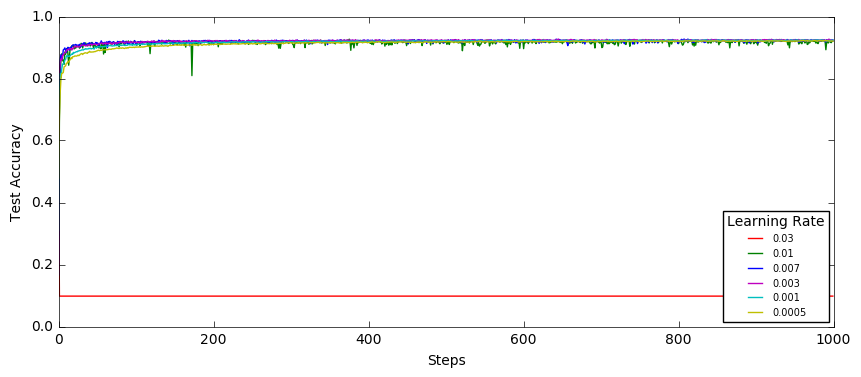

In [9]:
plot_performance_chart(acc_check, test_accuracy, LEARNING_RATES, 'Test Accuracy')

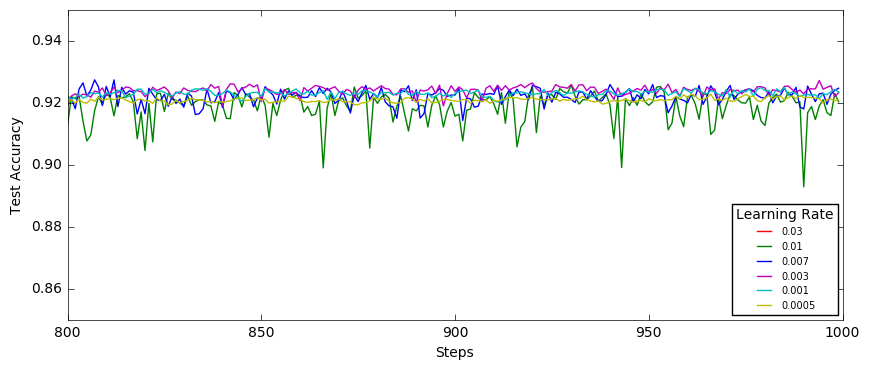

In [19]:
plot_performance_chart(acc_check, test_accuracy, LEARNING_RATES, 'Test Accuracy', 
                       xmin = 800, xmax = 1000, ymin = 0.85, ymax = 0.95)

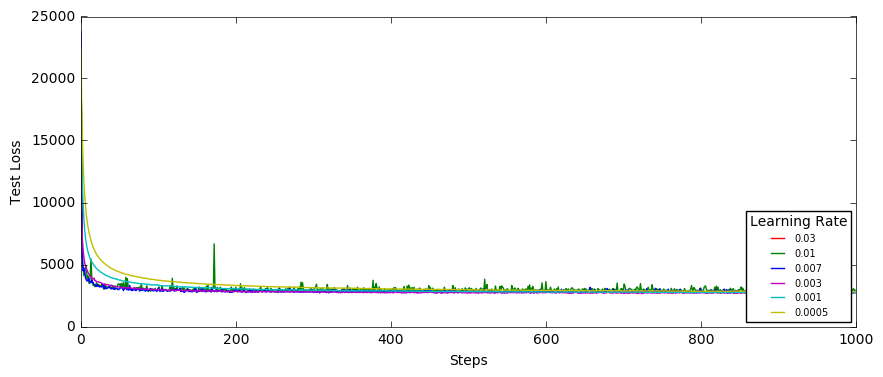

In [20]:
plot_performance_chart(acc_check, test_loss, LEARNING_RATES, 'Test Loss')

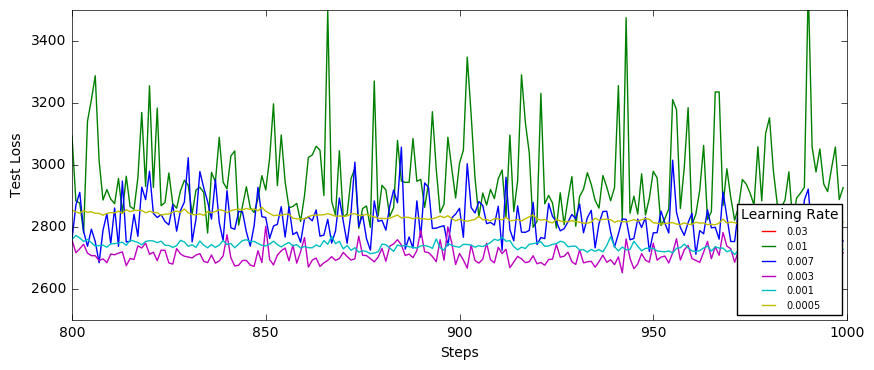

In [21]:
plot_performance_chart(acc_check, test_loss, LEARNING_RATES, 'Test Loss', 
                       xmin = 800, xmax = 1000, ymin = 2500, ymax = 3500)

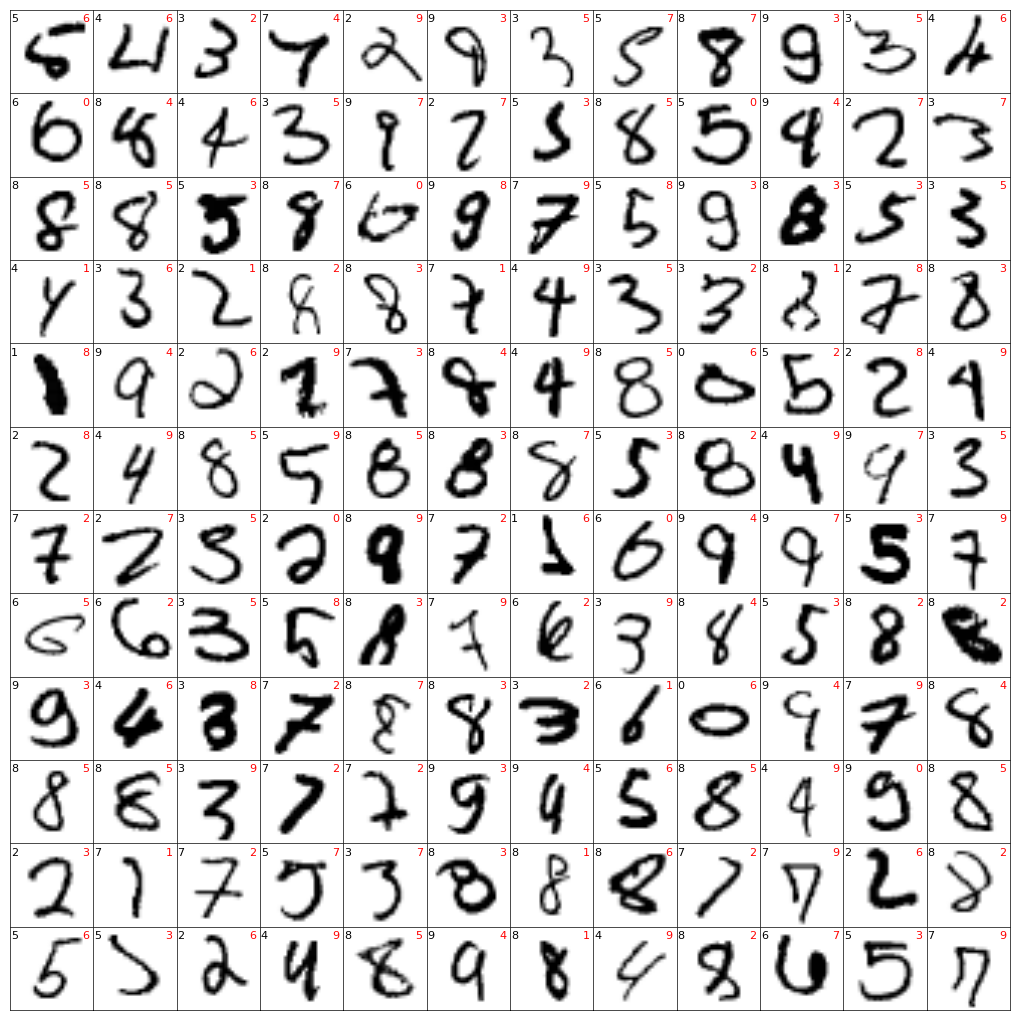

In [22]:
images = mnist.test.images
labels = np.argmax(mnist.test.labels, 1)
lr_index_to_render = 3
preds = predictions[lr_index_to_render]
incorects = np.not_equal(labels, preds)
plot_batch_images(images[incorects], labels[incorects], preds[incorects], 144)